In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Besant Technologies/Python_Data_Science/Datasets/Mall_Customers.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print("Features shape:", X.shape)
print(X.head())


Features shape: (200, 2)
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [9]:
y = (df['Spending Score (1-100)'] > 50).astype(int)
print("\nTarget distribution:\n", pd.Series(y).value_counts())


Target distribution:
 Spending Score (1-100)
0    103
1     97
Name: count, dtype: int64


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [18]:
best_knn = grid.best_estimator_
print(f"Best params: {grid.best_params_}")


Best params: {'n_neighbors': 5, 'weights': 'uniform'}


In [19]:
# 5. Predict & Evaluate
y_pred = best_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
 [[21  0]
 [ 1 18]]


Text(0.5, 1.0, 'Income vs Spending (Target)')

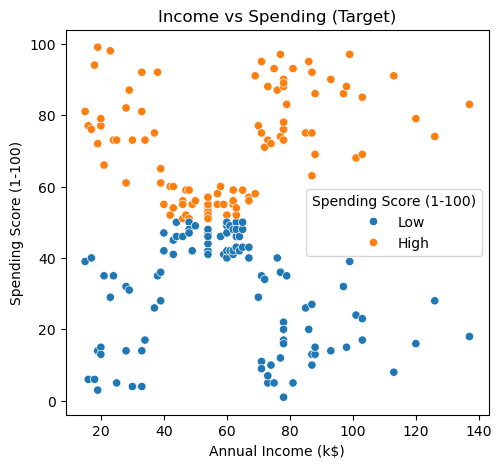

In [20]:
# 6. Visualize
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=y.map({0:'Low',1:'High'}))
plt.title('Income vs Spending (Target)')

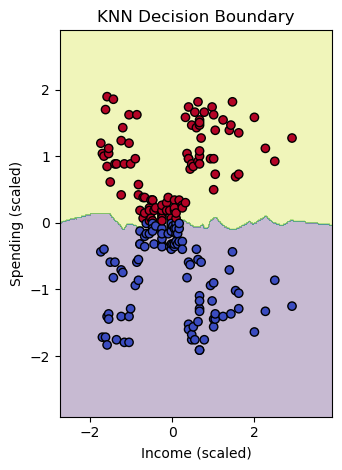

In [22]:
plt.subplot(1,2,2)
h = 0.02
x_min, x_max = X_scaled[:,0].min()-1, X_scaled[:,0].max()+1
y_min, y_max = X_scaled[:,1].min()-1, X_scaled[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Income (scaled)'); plt.ylabel('Spending (scaled)')
plt.title('KNN Decision Boundary')
plt.tight_layout()
plt.show()